In [9]:
import pandas as pd

In [25]:
data=pd.read_csv('tings.csv')

In [27]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
2,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
3,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
4,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No


In [29]:
from sklearn.preprocessing import LabelEncoder

In [31]:
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [33]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,2975,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,1420,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
2,3583,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
3,3608,0,0,0,0,8,1,2,1,0,...,2,0,2,2,0,1,2,99.65,820.50,1
4,536,1,0,0,1,22,1,2,1,0,...,0,0,2,0,0,1,1,89.10,1949.40,0


In [37]:
x=data.drop('Churn', axis=1) 
y=data['Churn']

In [39]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=42) # train test split

# Logistic Regression

In [41]:
from sklearn import linear_model

In [43]:
logr = linear_model.LogisticRegression()

In [47]:
logr.fit(xtrain, ytrain)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
ypred=logr.predict(xtest)

In [53]:
from sklearn.metrics import accuracy_score

In [55]:
accuracy_score(ytest,ypred)

0.6635706914344686

# Decision tree

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
# Define a range of depths to test
max_depths = range(2, 20)  # Example: testing max_depth from 1 to 10

# Initialize a dictionary to store accuracy results for each depth
accuracy_results = {}

# Loop through each max_depth value
for depth in max_depths:
    # Initialize the Decision Tree model with the current max_depth
    dt = DecisionTreeClassifier(criterion='entropy',max_depth=depth)
    
    # Train the model
    dt.fit(xtrain, ytrain)
    
    # Make predictions on the test data
    predictions = dt.predict(xtest)
    
    # Calculate accuracy
    accuracy = accuracy_score(ytest, predictions)
    
    # Store the accuracy in the dictionary
    accuracy_results[depth] = accuracy
    print(f'Max Depth: {depth}, Accuracy: {accuracy:.4f}')

Max Depth: 2, Accuracy: 0.6615
Max Depth: 3, Accuracy: 0.6522
Max Depth: 4, Accuracy: 0.6780
Max Depth: 5, Accuracy: 0.6832
Max Depth: 6, Accuracy: 0.6625
Max Depth: 7, Accuracy: 0.6636
Max Depth: 8, Accuracy: 0.6718
Max Depth: 9, Accuracy: 0.6574
Max Depth: 10, Accuracy: 0.6636
Max Depth: 11, Accuracy: 0.6553
Max Depth: 12, Accuracy: 0.6471
Max Depth: 13, Accuracy: 0.6378
Max Depth: 14, Accuracy: 0.6450
Max Depth: 15, Accuracy: 0.6326
Max Depth: 16, Accuracy: 0.6275
Max Depth: 17, Accuracy: 0.6357
Max Depth: 18, Accuracy: 0.6202
Max Depth: 19, Accuracy: 0.6285


In [61]:
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=5) # creating model at dept 3
dt1.fit(xtrain,ytrain)
predictions=dt1.predict(xtest)
accuracy_score(ytest,predictions)

0.6831785345717234

In [63]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [65]:
feat=list(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod', 'MonthlyCharges', 'TotalCharges'])
cls=list(['No','Yes'])

In [72]:
from sklearn import tree

In [74]:
import matplotlib.pyplot as plt

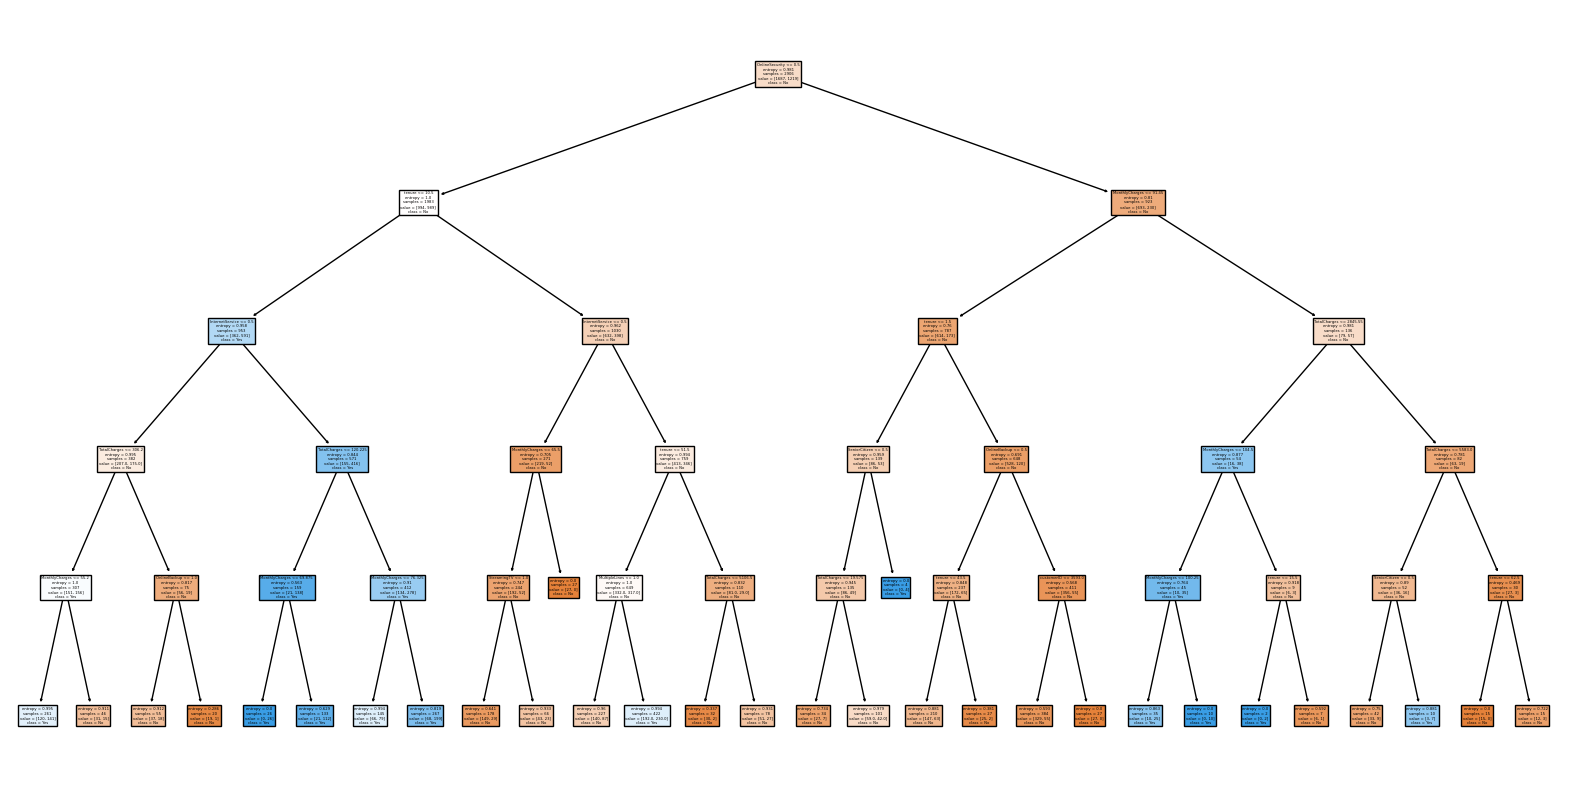

In [76]:
plt.figure(figsize=(20,10))
tree.plot_tree(dt1,filled=True,feature_names=feat,class_names=cls)
plt.show()